In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('dataset/cross-validation.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
df.shape

(614, 13)

In [7]:
df['Gender'].fillna('Other',inplace=True)
df['Dependents'].fillna(0,inplace=True)
df['Self_Employed'].fillna('Both',inplace=True)
df['Credit_History'].fillna(0,inplace=True)

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: xlabel='Gender', ylabel='count'>

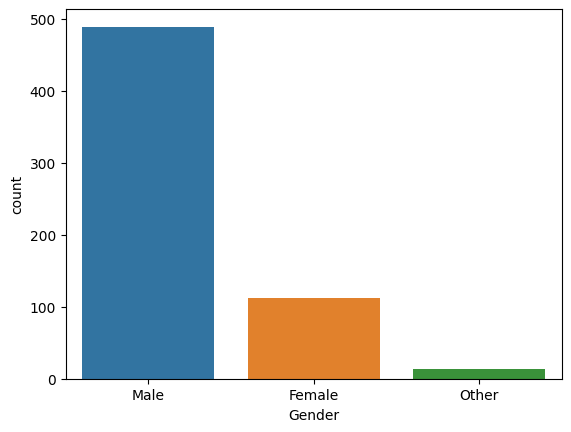

In [9]:
sns.countplot(x='Gender',data=df)

<Axes: xlabel='Education', ylabel='count'>

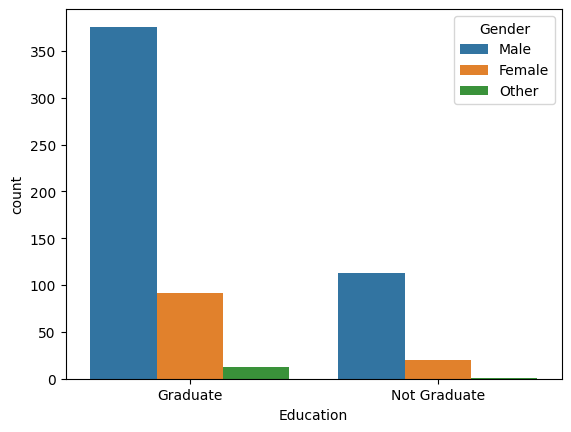

In [10]:
sns.countplot(x='Education',hue='Gender',data=df)

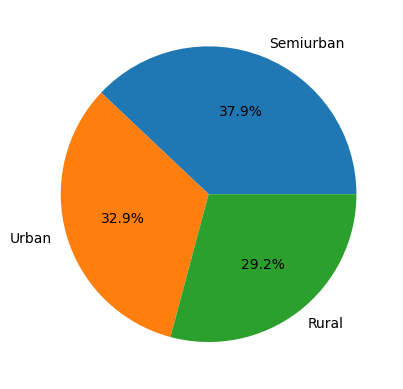

In [11]:
s=df['Property_Area'].value_counts()/df['Property_Area'].value_counts().sum()*100
plt.pie(s.values,labels=s.index,autopct='%1.1f%%')
plt.show()

<Axes: xlabel='ApplicantIncome', ylabel='LoanAmount'>

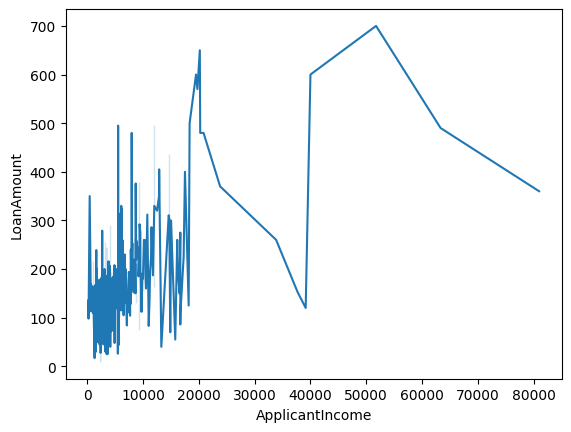

In [12]:
sns.lineplot(x='ApplicantIncome',y='LoanAmount',data=df)

<Axes: xlabel='CoapplicantIncome', ylabel='LoanAmount'>

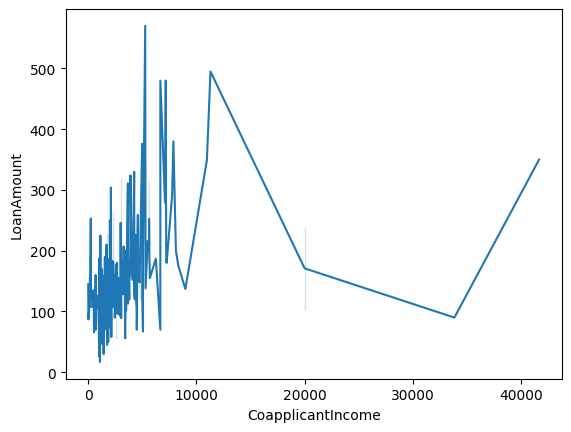

In [13]:
sns.lineplot(x='CoapplicantIncome',y='LoanAmount',data=df)

In [14]:
import numpy as np

In [15]:
incomeType=[]
for i in df['ApplicantIncome']:
    if i>6000:
        incomeType.append('High')
    elif i<6000 and i>4000:
        incomeType.append('Medium')
    else:
        incomeType.append('Low')
df['ApplicantIncomeStatus']=pd.Series(incomeType)
df['CoapplicantIncome']=np.where(df['CoapplicantIncome']>0,'Yes','No')

In [16]:
df['ApplicantIncomeStatus'].value_counts()

ApplicantIncomeStatus
Low       340
Medium    137
High      137
Name: count, dtype: int64

<Axes: xlabel='ApplicantIncomeStatus', ylabel='LoanAmount'>

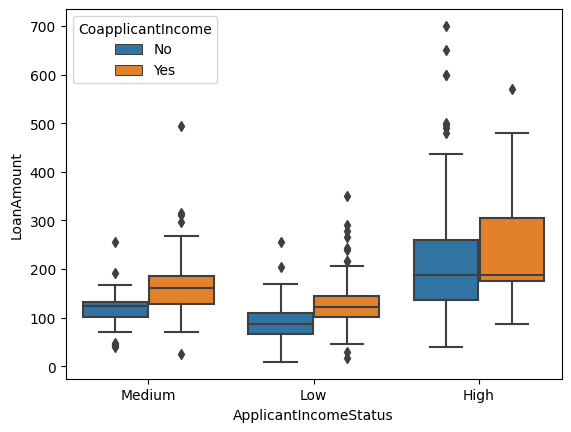

In [17]:
sns.boxplot(x='ApplicantIncomeStatus',y='LoanAmount',hue='CoapplicantIncome',data=df)

<Axes: xlabel='Property_Area', ylabel='LoanAmount'>

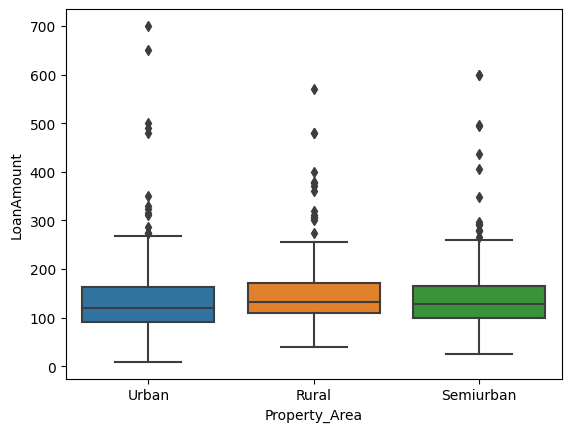

In [18]:
sns.boxplot(x='Property_Area',y='LoanAmount',data=df)

In [19]:
df.groupby(['Married','Education','Self_Employed','Dependents'])['LoanAmount'].mean()

Married  Education     Self_Employed  Dependents
No       Graduate      Both           0             174.833333
                                      1             104.000000
                                      2             120.000000
                                      3+            350.000000
                       No             0             104.500000
                                      0             125.564815
                                      1             120.545455
                                      2             128.428571
                                      3+            253.333333
                       Yes            0             163.764706
                                      1             128.000000
                                      3+            292.000000
         Not Graduate  Both           0             123.000000
                                      1             132.000000
                       No             0              94.137931
      

In [20]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,ApplicantIncomeStatus
0,LP001002,Male,No,0,Graduate,No,5849,No,NaN,360.0,1.0,Urban,Y,Medium
1,LP001003,Male,Yes,1,Graduate,No,4583,Yes,128.0,360.0,1.0,Rural,N,Medium
2,LP001005,Male,Yes,0,Graduate,Yes,3000,No,66.0,360.0,1.0,Urban,Y,Low
3,LP001006,Male,Yes,0,Not Graduate,No,2583,Yes,120.0,360.0,1.0,Urban,Y,Low
4,LP001008,Male,No,0,Graduate,No,6000,No,141.0,360.0,1.0,Urban,Y,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,No,71.0,360.0,1.0,Rural,Y,Low
610,LP002979,Male,Yes,3+,Graduate,No,4106,No,40.0,180.0,1.0,Rural,Y,Medium
611,LP002983,Male,Yes,1,Graduate,No,8072,Yes,253.0,360.0,1.0,Urban,Y,High
612,LP002984,Male,Yes,2,Graduate,No,7583,No,187.0,360.0,1.0,Urban,Y,High


In [21]:
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1, 'Other':2})
df['Married'] = df['Married'].map({'Yes': 0, 'No': 1})
df['Dependents'] = df['Dependents'].map({'0': 0, '1': 1 ,'2': 2 ,'3+': 3})
df['Education'] = df['Education'].map({'Graduate': 0, 'Not Graduate': 1})
df['Self_Employed'] = df['Self_Employed'].map({'Yes': 0, 'No': 1, 'Both': 2})
df['Property_Area'] = df['Property_Area'].map({'Urban': 0, 'Rural': 1 ,'Semiurban': 2})

In [22]:
df['Loan_Status'] = df['Loan_Status'].map({'Y': 0, 'N': 1})
df['ApplicantIncomeStatus'] = df['ApplicantIncomeStatus'].map({'Low':0, 'Medium':1, 'High':2})

In [23]:
df['CoapplicantIncome']=df['CoapplicantIncome'].map({'Yes':0, 'No':1})

In [24]:
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].replace(np.nan,df['Loan_Amount_Term'].mean())
df['LoanAmount'] = df['LoanAmount'].replace(np.nan,df['LoanAmount'].mean())
df['Dependents'] = df['Dependents'].replace(np.nan,0)
df['Married'] = df['Married'].replace(np.nan,1)


In [25]:
df.isna().sum()

Loan_ID                  0
Gender                   0
Married                  0
Dependents               0
Education                0
Self_Employed            0
ApplicantIncome          0
CoapplicantIncome        0
LoanAmount               0
Loan_Amount_Term         0
Credit_History           0
Property_Area            0
Loan_Status              0
ApplicantIncomeStatus    0
dtype: int64

In [26]:
columns = df.select_dtypes(exclude='int').columns
columns

Index(['Loan_ID', 'Married', 'Dependents', 'LoanAmount', 'Loan_Amount_Term',
       'Credit_History'],
      dtype='object')

In [27]:
df=df.drop(['Loan_ID'],axis=1)
df=df.drop(['ApplicantIncome'],axis=1)

In [28]:
df['Loan_Amount_Term']=df['Loan_Amount_Term'].div(max(df['Loan_Amount_Term']))

In [29]:
df['LoanAmount']=df['LoanAmount'].div(max(df['LoanAmount']))

In [30]:
df

,Gender,Married,Dependents,Education,Self_Employed,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,ApplicantIncomeStatus
0,0,1.0,0.0,0,1,1,0.209160,0.750,1.0,0,0,1
1,0,0.0,1.0,0,1,0,0.182857,0.750,1.0,1,1,1
2,0,0.0,0.0,0,0,1,0.094286,0.750,1.0,0,0,0
3,0,0.0,0.0,1,1,0,0.171429,0.750,1.0,0,0,0
4,0,1.0,0.0,0,1,1,0.201429,0.750,1.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
609,1,1.0,0.0,0,1,1,0.101429,0.750,1.0,1,0,0
610,0,0.0,3.0,0,1,1,0.057143,0.375,1.0,1,0,1
611,0,0.0,1.0,0,1,0,0.361429,0.750,1.0,0,0,2
612,0,0.0,2.0,0,1,1,0.267143,0.750,1.0,0,0,2


<Axes: >

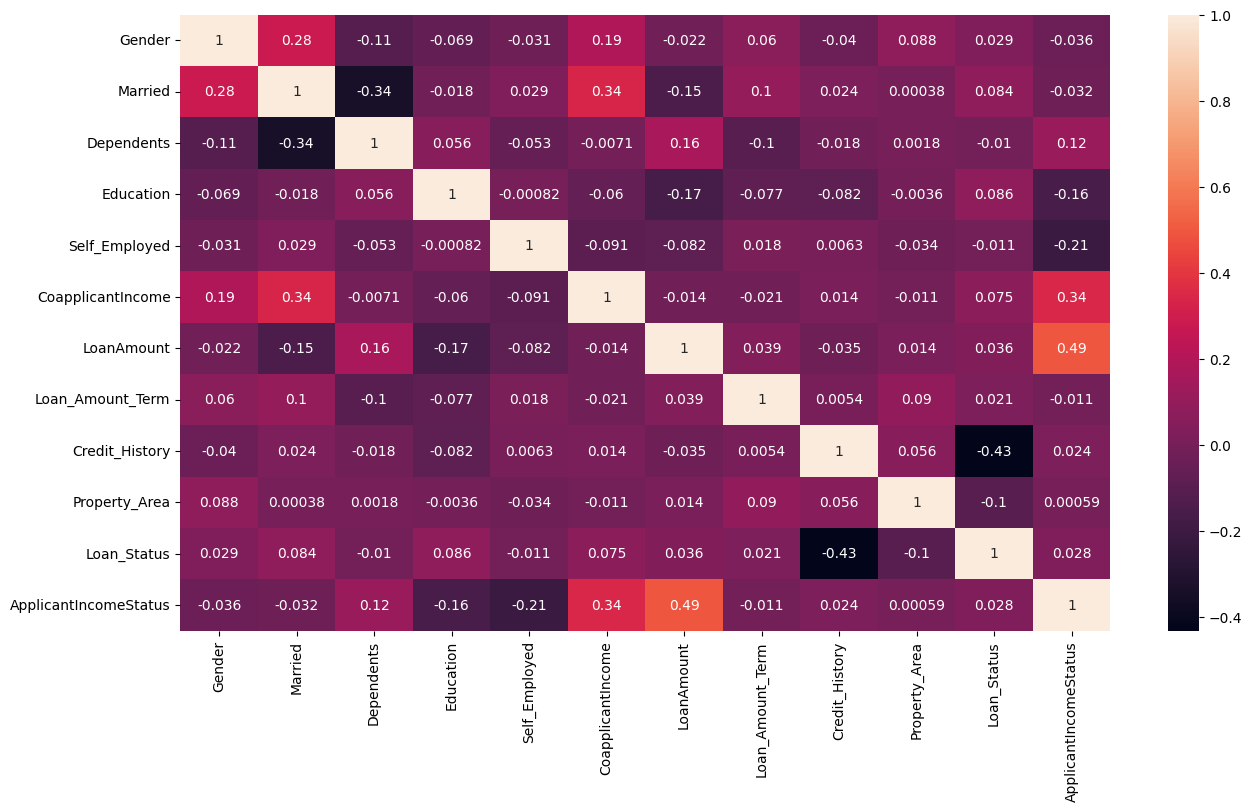

In [31]:
plt.figure(figsize=[15,8])
sns.heatmap(df.corr(),annot=True)

In [32]:
X = df.drop('Loan_Status', axis=1)
Y = df['Loan_Status']

In [33]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(X, Y , test_size = 0.2 , random_state = 42, stratify=Y)

In [34]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [35]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train_scaled,y_train)
y_pred = model.predict(x_test_scaled)

In [36]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.85      0.82        85
           1       0.61      0.53      0.56        38

    accuracy                           0.75       123
   macro avg       0.70      0.69      0.69       123
weighted avg       0.74      0.75      0.74       123



K-Fold Validation

In [37]:
X=df.drop('Loan_Status', axis=1)
Y= df['Loan_Status']
nData = int(X.shape[0]/5)
folds=[]
targets=[]
s=0
e=nData
while(e<X.shape[0]):
    fold=X.loc[s:e]
    target=Y.loc[s:e]
    folds.append(fold)
    targets.append(target)
    s=e+1
    e=s+nData
folds.append(X.loc[s:])
targets.append(Y.loc[s:])
    

In [38]:
train_data=[]
target_train=[]
test_data=[]
target_test=[]
k=len(folds)
for i in range(0,k):
    test_data.append(folds[i])
    target_test.append(targets[i])
    data=[]
    target=[]
    for j in range(0,k):
        if(i==j):
            continue
        data.append(folds[j])
        target.append(targets[j])
    train_data.append(pd.concat(data))
    target_train.append(pd.concat(target))

In [39]:
model1 = LogisticRegression(penalty=None, solver='saga', max_iter=300)

In [40]:
for i in range(0,k):
    model1.fit(train_data[i],target_train[i])
    y_pred = model1.predict(test_data[i])
    print(f"Trained with Fold {i+1}")
    print(classification_report(target_test[i],y_pred))
    print(f"Accuracy: {model1.score(test_data[i], target_test[i])}")
    print("-------------------------------------------")

Trained with Fold 1
              precision    recall  f1-score   support

           0       0.77      0.93      0.84        83
           1       0.74      0.42      0.54        40

    accuracy                           0.76       123
   macro avg       0.75      0.68      0.69       123
weighted avg       0.76      0.76      0.74       123

Accuracy: 0.7642276422764228
-------------------------------------------
Trained with Fold 2
              precision    recall  f1-score   support

           0       0.76      0.88      0.81        84
           1       0.60      0.38      0.47        39

    accuracy                           0.72       123
   macro avg       0.68      0.63      0.64       123
weighted avg       0.71      0.72      0.70       123

Accuracy: 0.7235772357723578
-------------------------------------------
Trained with Fold 3
              precision    recall  f1-score   support

           0       0.78      0.87      0.83        87
           1       0.58      0.